### 폰트

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())


print ('설정파일 위치: ', mpl.matplotlib_fname())


font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list))

font_list

버전:  3.7.1
설치 위치:  /usr/local/lib/python3.10/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib
설정파일 위치:  /usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc
29


['/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/liberation/Liberati

In [ ]:
# seabron으로 그래프 스타일 설정
import seaborn as sns

"""
아래 5개중 원하는 그래프 스타일 설정.
"""
# sns.set_style('whitegrid')
sns.set_style('darkgrid')
# sns.set_style('dark')
# sns.set_style('white')
# sns.set_style('ticks')

#----------------------------------------------------위 아래가 아예 다른내용이지만, seaborn설정후 폰트적용 셀을 매번 꼭 다시 실행해줘야하기에 셀을 붙여놨습니다.

# matplot으로 한글 font 설정
import matplotlib
import matplotlib.pyplot as plt

# 한글 폰트 사용시 글자를 선명하게
%config InlineBackend.figure_format = 'retina'

# '-' 음수 부호 보이게 설정
matplotlib.rc('axes', unicode_minus=False)

# 한글 폰트 설치
# plt.rc('font', family='NanumBarunGothic')
plt.rc('font', family='NanumGothic')

### 라이브러리 호출

In [ ]:
# 연산 처리  패키지
import pandas as pd
import numpy as np

# 시각화 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 통계분석 패키지
import statsmodels.api as sm

# 그래프 설정
%matplotlib inline

# 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

### Data 불러오기

In [ ]:
# 코랩 mount
from google.colab import drive
drive.mount('/content/drive')

# 데이터 읽어오기
df1 = pd.read_csv("/content/drive/MyDrive/Dataset/(자동차보험) 고객별 사고 발생률 예측 모델링_1.csv", encoding = "cp949", engine='python')
df2 = pd.read_csv("/content/drive/MyDrive/Dataset/(자동차보험) 고객별 사고 발생률 예측 모델링_2.csv", encoding = "cp949", engine='python')
df3 = pd.read_csv("/content/drive/MyDrive/Dataset/(자동차보험) 고객별 사고 발생률 예측 모델링_3.csv", encoding = "cp949", engine='python')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 이상 없는 df의 column 확인
col = df2.columns

# 오류로 생성된 column 삭제
df1 = df1[col]

# df1의 파일상 null 행 삭제
null_idx = df1[df1["차종"].isnull()].index.tolist()
df1 = df1.drop(index = null_idx)

df1

,ZCPRLCLCD,ZINSRDAVL,ZIOSEXCD,ZDPRODSCD,NCR,ZCARPSGVL,차종,ZDRVLISCD,ZDRVLISCD___T,ZENTCARCD,ZCARISDAM,ZIMAGERVL,마일리지약정거리,YUHO,SAGO
0,A10,0.0,1.0,NaN,B,신차,기타,5.0,가족및형제자매한정,8.0,5천만원이하,가입,15000K,1,0.0
1,A10,0.0,1.0,NaN,N,신차,기타,4.0,기명피보험자1인한정,8.0,미가입,미가입,15000K,1,0.0
2,A10,0.0,1.0,NaN,N,신차,기타,2.0,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,1,3.0
3,A10,0.0,1.0,1.0,N,10년이상,중형,2.0,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0,0.0
4,A10,0.0,1.0,1.0,Z,5년이하,다목적2종,2.0,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105812,A10,40.0,1.0,1.0,D,5년이하,중형,4.0,기명피보험자1인한정,6.0,5천만원이하,미가입,미가입,1,0.0
105813,A10,40.0,1.0,1.0,D,10년이상,소형A,3.0,부부한정,2.0,5천만원이하,미가입,15000K,2,0.0
105814,A10,40.0,1.0,1.0,D,10년이하,대형,3.0,부부한정,2.0,5천만원이하,가입,15000K,2,0.0
105815,A10,40.0,1.0,1.0,D,10년이상,중형,3.0,부부한정,7.0,5천만원이하,미가입,15000K,18,3.0


In [ ]:
# 데이터 프레임 합치기
df = pd.concat([df1, df2, df3], ignore_index = True)
df

,ZCPRLCLCD,ZINSRDAVL,ZIOSEXCD,ZDPRODSCD,NCR,ZCARPSGVL,차종,ZDRVLISCD,ZDRVLISCD___T,ZENTCARCD,ZCARISDAM,ZIMAGERVL,마일리지약정거리,YUHO,SAGO
0,A10,0.0,1.0,NaN,B,신차,기타,5.0,가족및형제자매한정,8.0,5천만원이하,가입,15000K,1,0.0
1,A10,0.0,1.0,NaN,N,신차,기타,4.0,기명피보험자1인한정,8.0,미가입,미가입,15000K,1,0.0
2,A10,0.0,1.0,NaN,N,신차,기타,2.0,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,1,3.0
3,A10,0.0,1.0,1.0,N,10년이상,중형,2.0,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0,0.0
4,A10,0.0,1.0,1.0,Z,5년이하,다목적2종,2.0,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267772,A10,40.0,2.0,1.0,C,10년이상,중형,1.0,누구나(기본),8.0,미가입,미가입,7000K,0,0
267773,A10,40.0,2.0,1.0,C,5년이하,소형A,12.0,부부 및 자녀한정,8.0,5천만원이하,가입,15000K,2,0
267774,A10,40.0,2.0,1.0,C,10년이하,소형A,4.0,기명피보험자1인한정,8.0,미가입,미가입,미가입,6,1
267775,A10,40.0,2.0,1.0,C,5년이하,소형B,1.0,누구나(기본),7.0,5천만원이하,가입,미가입,0,0


In [ ]:
# 수치형인데 object인 column 형변환
df['YUHO'] = df['YUHO'].str.replace(',', '').astype(int)
df['SAGO'] = df['SAGO'].apply(lambda x: int(float(str(x).replace(',', '').split('.')[0])))
df['SAGO'] = df['SAGO'].replace(',', '').astype(int)

# column명 한글로 변환
df = df.rename(columns = {"ZINSRDAVL": "연령대", "ZIOSEXCD": "성별",
                        "ZDPRODSCD": "국산차량여부", "NCR": "직전3년간사고건수",
                        "ZCARPSGVL": "차량경과년수", "ZDRVLISCD___T": "운전자한정특별약관",
                        "ZENTCARCD": "가입경력코드", "ZCARISDAM": "차량가입금액",
                        "ZIMAGERVL": "영상기록장치특약가입", "YUHO": "유효대수",
                        "SAGO" : "사고건수"})

# 사용하지 않는 column drop
df = df.drop(columns = ['ZCPRLCLCD', 'ZDRVLISCD'])
df

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리,유효대수,사고건수
0,0.0,1.0,NaN,B,신차,기타,가족및형제자매한정,8.0,5천만원이하,가입,15000K,1,0
1,0.0,1.0,NaN,N,신차,기타,기명피보험자1인한정,8.0,미가입,미가입,15000K,1,0
2,0.0,1.0,NaN,N,신차,기타,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,1,3
3,0.0,1.0,1.0,N,10년이상,중형,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0,0
4,0.0,1.0,1.0,Z,5년이하,다목적2종,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267772,40.0,2.0,1.0,C,10년이상,중형,누구나(기본),8.0,미가입,미가입,7000K,0,0
267773,40.0,2.0,1.0,C,5년이하,소형A,부부 및 자녀한정,8.0,5천만원이하,가입,15000K,2,0
267774,40.0,2.0,1.0,C,10년이하,소형A,기명피보험자1인한정,8.0,미가입,미가입,미가입,6,1
267775,40.0,2.0,1.0,C,5년이하,소형B,누구나(기본),7.0,5천만원이하,가입,미가입,0,0


In [ ]:
# 사고율 / 사고유무 df 생성
df['사고율'] = df.apply(lambda row: 0 if row['유효대수'] == 0 else row['사고건수'] / row['유효대수'], axis = 1)
df['사고유무'] = df.apply(lambda row: 0 if row['사고건수'] == 0 else 1, axis = 1)
df_per = df.drop(columns = ['사고유무','사고건수', '유효대수'])
df_yn = df.drop(columns = ['사고율','사고건수', '유효대수'])

In [ ]:
df_per.head(5)

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리,사고율
0,0.0,1.0,NaN,B,신차,기타,가족및형제자매한정,8.0,5천만원이하,가입,15000K,0.0
1,0.0,1.0,NaN,N,신차,기타,기명피보험자1인한정,8.0,미가입,미가입,15000K,0.0
2,0.0,1.0,NaN,N,신차,기타,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,3.0
3,0.0,1.0,1.0,N,10년이상,중형,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0.0
4,0.0,1.0,1.0,Z,5년이하,다목적2종,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0.0


In [ ]:
df_yn.head(5)

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리,사고유무
0,0.0,1.0,NaN,B,신차,기타,가족및형제자매한정,8.0,5천만원이하,가입,15000K,0
1,0.0,1.0,NaN,N,신차,기타,기명피보험자1인한정,8.0,미가입,미가입,15000K,0
2,0.0,1.0,NaN,N,신차,기타,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,1
3,0.0,1.0,1.0,N,10년이상,중형,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0
4,0.0,1.0,1.0,Z,5년이하,다목적2종,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0


## Control 생성

### 함수 정의

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve, mean_squared_error
import math

In [ ]:
# ROC 커브 그리는 함수
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color="red", label="ROC")
    plt.plot([0, 1], [0, 1], color="green", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend()
    plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

## SVM 모델
def svm_classifier(X_train, X_test, y_train, y_test):
    # SVM 초기화
    model = SVC(probability=True)  # 확률 예측을 위해 probability=True로 설정

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1].reshape(-1, 1)  # 양성 클래스에 대한 확률 추출

    # 평가지표 출력
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # F1 점수 계산
    auc = roc_auc_score(y_test, y_proba)

    return accuracy, report, f1, auc


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

def random_forest_classifier(X_train, X_test, y_train, y_test):
    # 랜덤 포레스트 초기화
    model = RandomForestClassifier()  # 트리 개수는 100으로 설정

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1].reshape(-1, 1)  # 양성 클래스에 대한 확률 추출


    feature_names = X_train.columns.tolist()

    # 피처 중요도 추출
    feature_importance = model.feature_importances_

    feature_importance_result = ""
    for i, importance in enumerate(feature_importance):
        feature_importance_result += f"""Feature '{feature_names[i]}': {importance}
        """


    # 평가지표 출력
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # F1 점수 계산
    auc = roc_auc_score(y_test, y_proba)

    return accuracy, report, f1, auc, feature_importance_result


In [ ]:
# 로지스틱 회귀 함수
def logistic_classifier(X_train, X_test, y_train, y_test):
    # LogisticRegression 초기화
    model = LogisticRegression()

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1].reshape(-1,1)

    # 평가지표 출력
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # F1 점수 계산
    auc = roc_auc_score(y_test, y_proba)


    return accuracy, report, f1, auc


    # print(f"정확도 : {accuracy} \n")
    # print("분류 보고서 :\n", report, "\n")
    # print(f"F1 점수 : {f1} \n")
    # print(f"auc : {auc} \n")

    # fper, tper, thresholds = roc_curve(y_test, y_proba)
    # plot_roc_curve(fper, tper)

    # return model, y_pred

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(yn_dummy_X, yn_y,
                                                    test_size = 0.2,
                                                    random_state = 39)

# model fit
random_forest_classifier(X_train, X_test, y_train, y_test)

(0.7783068190305474,
 '              precision    recall  f1-score   support\n\n           0       0.80      0.92      0.85     37480\n           1       0.70      0.45      0.55     16076\n\n    accuracy                           0.78     53556\n   macro avg       0.75      0.69      0.70     53556\nweighted avg       0.77      0.78      0.76     53556\n',
 0.7621663898261157,
 0.7679650935338359,
 "Feature '연령대_10.0': 0.00022475321876016497\n        Feature '연령대_100.0': 7.236706396450641e-05\n        Feature '연령대_20.0': 0.01431493095253012\n        Feature '연령대_30.0': 0.02573886366573594\n        Feature '연령대_40.0': 0.026265524179688353\n        Feature '연령대_50.0': 0.0229070140708485\n        Feature '연령대_60.0': 0.02028293523102068\n        Feature '연령대_70.0': 0.014581264909856598\n        Feature '연령대_80.0': 0.007495635123672653\n        Feature '연령대_90.0': 0.0020548394658400615\n        Feature '연령대_nan': 0.0\n        Feature '성별_2.0': 0.06498487253949906\n        Feature '성별_nan':

### 이밑은 사고율 예측을 위한 회귀

In [ ]:
# 선형회귀 - sklearn 사용
def linear_regression(X_train, X_test, y_train, y_test):
    # LinearRegression 초기화
    model = LinearRegression()

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)

    # 평가지표 출력
    r_square = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)


    return r_square, mse


    # print(f"R-square : {r_square} \n")
    # print(f"RMSE : {math.sqrt(mse)}\n")
    # print(f"기울기\n")
    # for i, col_name in enumerate(X_train.columns):
    #   print(f"{col_name} : {model.coef_[i]}")
    # print(f"\n절편 : {model.intercept_} \n")

    # return model, y_pred

### 데이터셋 생성

In [ ]:
# x, y 분리
yn_X = df_yn.drop(columns = ["사고유무"])
yn_y = df_yn["사고유무"]

per_X = df_per.drop(columns = ["사고율"])
per_y = df_per["사고율"]

In [ ]:
yn_X

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리
0,0.0,1.0,NaN,B,신차,기타,가족및형제자매한정,8.0,5천만원이하,가입,15000K
1,0.0,1.0,NaN,N,신차,기타,기명피보험자1인한정,8.0,미가입,미가입,15000K
2,0.0,1.0,NaN,N,신차,기타,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입
3,0.0,1.0,1.0,N,10년이상,중형,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K
4,0.0,1.0,1.0,Z,5년이하,다목적2종,가족한정(형제자매제외),1.0,미가입,미가입,미가입
...,...,...,...,...,...,...,...,...,...,...,...
267772,40.0,2.0,1.0,C,10년이상,중형,누구나(기본),8.0,미가입,미가입,7000K
267773,40.0,2.0,1.0,C,5년이하,소형A,부부 및 자녀한정,8.0,5천만원이하,가입,15000K
267774,40.0,2.0,1.0,C,10년이하,소형A,기명피보험자1인한정,8.0,미가입,미가입,미가입
267775,40.0,2.0,1.0,C,5년이하,소형B,누구나(기본),7.0,5천만원이하,가입,미가입


#### 라이브러리를 통한 자동 변환

1. 모든 범주형 변수를 원핫 인코딩 / 라벨 인코딩

In [ ]:
# 전부 원핫 돌리기 위해 수치형 변수 문자로 변경
numeric = (yn_X.dtypes == np.float64) | (yn_X.dtypes == np.int64)
numeric_col = yn_X.columns[numeric].tolist()

for col_name in numeric_col:
  yn_X[col_name] = yn_X[col_name].astype(str)
  per_X[col_name] = per_X[col_name].astype(str)

In [ ]:
# One-Hot Encoding
yn_dummy_X = pd.get_dummies(yn_X, dummy_na = True, drop_first = True)
per_dummy_X = pd.get_dummies(per_X, dummy_na = True, drop_first = True)

In [ ]:
yn_dummy_X

,연령대_10.0,연령대_100.0,연령대_20.0,연령대_30.0,연령대_40.0,연령대_50.0,연령대_60.0,연령대_70.0,연령대_80.0,연령대_90.0,...,차량가입금액_nan,영상기록장치특약가입_미가입,영상기록장치특약가입_nan,마일리지약정거리_12000K,마일리지약정거리_15000K,마일리지약정거리_3000K,마일리지약정거리_5000K,마일리지약정거리_7000K,마일리지약정거리_미가입,마일리지약정거리_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267772,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
267773,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
267774,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
267775,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Label Encoding
yn_label_X = yn_X.copy()
per_label_X = per_X.copy()

le = LabelEncoder()

for col_name in yn_label_X.columns:
    le = LabelEncoder()
    le = le.fit(yn_label_X[col_name])
    yn_label_X[col_name] = le.transform(yn_label_X[col_name])

for col_name in per_X.columns:
    le = LabelEncoder()
    le = le.fit(per_label_X[col_name])
    per_label_X[col_name] = le.transform(per_label_X[col_name])

In [ ]:
per_label_X.head(5)

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리
0,0,0,2,1,3,0,3,7,2,0,2
1,0,0,2,4,3,0,5,7,3,1,2
2,0,0,2,4,3,0,4,4,2,0,6
3,0,0,0,4,0,6,4,1,2,1,2
4,0,0,0,5,2,2,4,0,3,1,6


### Case 나누기

In [ ]:
import pandas as pd


# 1. 0~10대만 지우기
def remove_age(df, remove_age_list, flag):
    if flag == 0:
      # '연령대' 열에서 remove_age_list 안에 있는 값을 제거
      age_removed_df = df[~df['연령대'].isin(remove_age_list)]

      return age_removed_df

    else:
      return df



# 2. 연령, 성별 빼고 중복된 정보를 제거
def remove_columns_and_duplicates(df, remove_column_list, flag):

    if flag == 0:
      # '연령'과 '성별' 열 제거
      remove_column_df = df.drop(columns=remove_column_list, inplace=False)

      # 중복된 열 제거
      removed_df = remove_column_df.drop_duplicates(keep="first")

      return removed_df

    else:
      return df


# 3. NCR 0을 N으로 합치기 혹은 날리기
def replace_NCR_nan(df, flag):
  if flag == 0:
    filtered_df = df.copy()
    filtered_df['직전3년간사고건수'] = df['직전3년간사고건수'].replace('결측치', 0)
  else:
    filtered_df = df[df['직전3년간사고건수'] != '결측치']

  return filtered_df


# 4. 국산코드 결측치 -> 날리기
def drop_nan_prod(df):
  return df.dropna(subset=['국산차량여부'], inplace=False)

# 5. 사고율이나 유효대수를 SAGO quatile 기준으로 날리기. 날린다면 얼마나?
def remove_SAGO_outliers(df, q):
  trimmed_df = df[df['사고건수'] <= df['사고건수'].quantile(q)]

  return trimmed_df

# 6. 임직원 한정..?
def remove_executives(df, flag):

  if flag == 0:
    df_filtered = df[df['운전자한정특별약관'] != '임직원한정']
    return df_filtered
  else:
    return df

# 7. 사고율에서 유효 0인 경우 유효 1로 잡기 또는 전부 날리기.
def make_sago_rate(df, value):

  new_df = df.copy()

  if value == 0:
    # new_df['사고율'] = new_df.apply(lambda row: 0 if row['유효대수'] == 0 else row['사고건수'] / row['유효대수'], axis=1)
    new_df['유효대수'] += 0.5
    new_df['사고율'] = new_df['사고건수'] / new_df['유효대수']
  elif value == 1:
    new_df.loc[new_df['유효대수'] == 0, '유효대수'] = 0.5
    new_df['사고율'] = new_df['사고건수'] / new_df['유효대수']
  else:
    new_df = df[df['유효대수'] != 0].copy()
    new_df['사고율'] = new_df['사고건수'] / new_df['유효대수']

  return new_df


In [ ]:
remove_age_list = [0, 10]
remove_column_list = ['연령대', '성별', '가입경력코드']
quantile_list = [0.70,0.71, 0.86, 0.91,0.95, 0.97, 0.99, 1]

In [ ]:
import numpy as np
from tqdm import tqdm
import time
from sklearn.metrics import mean_squared_error



columns = ['label', 'model', 'encoding', 'accuracy', 'report', 'f1', 'auc', "feature_importance"]

# 빈 데이터프레임 생성
AAA = pd.DataFrame(columns=columns)



def test_all_case(df0):
  sizes = (2, 2, 2, 8, 2, 3)
  df_list = np.zeros(sizes)

  start_time = time.time()

  count = - 1 / 32
  for a in range(2): # 1. 0, 10대 지운것과 안지운것 -> 2진분류
    for b in range(2): # 2. 연령성별 빼고 중복된것 제거, 제거X -> 2진분류
      for c in range(1): # 3. NCR 0을 날리기 or N에 합치기 -> 2진분류
        for e in range(2, 8): # 5. 사고 건수를 Quantile 기준으로 날리기. -> 적절한 수치를 찾아야함
          if (e % 2 == 0):
            count += 1/32
            print(count*100, "% 완료, 걸린시간:", time.time() - start_time, "초")
            AAA.to_csv(r'/content/drive/MyDrive/Dataset/things_rf.csv', index=False)
          for f in range(2): # 6. 임직원 한정 제거 or 제거 X -> 2진분류
              # for g in range(3): # 7. 유효대수 0인경우, 사고율을 0으로 잡기, 유효대수를 1로 바꾸기, 전부 날리기. -> 3진분류


              label_num = ""
              if a == 0:
                label_num+= "연령대제거/"
              if b == 0:
                label_num += "연령성별가입년도중복제거/ "
              label_num += f"사고건수 상위{1-quantile_list[e]}제거/"
              if f == 0:
                label_num += "임직원제거"




              try:
                dfa = remove_age(df0, remove_age_list, a)
                dfb = remove_columns_and_duplicates(dfa, remove_column_list, b)
                dfc = replace_NCR_nan(dfb, c)
                dfe = remove_SAGO_outliers(dfc, quantile_list[e])
                dff = remove_executives(dfe, f)
                # dfg = make_sago_rate(dff, g)







                # df_per = dff.drop(columns = ['사고유무','사고건수', '유효대수'])
                df_yn = dff.drop(columns = ['사고율','사고건수', '유효대수'])



                # x, y 분리
                yn_X = df_yn.drop(columns = ["사고유무"])
                yn_y = df_yn["사고유무"]

                # per_X = df_per.drop(columns = ["사고율"])
                # per_y = df_per["사고율"]



                # 전부 원핫 돌리기 위해 수치형 변수 문자로 변경
                numeric = (yn_X.dtypes == np.float64) | (yn_X.dtypes == np.int64)
                numeric_col = yn_X.columns[numeric].tolist()

                for col_name in numeric_col:
                  yn_X[col_name] = yn_X[col_name].astype(str)
                  per_X[col_name] = per_X[col_name].astype(str)


                # One-Hot Encoding
                yn_dummy_X = pd.get_dummies(yn_X, dummy_na = True, drop_first = True)
                per_dummy_X = pd.get_dummies(per_X, dummy_na = True, drop_first = True)




                # Label Encoding
                yn_label_X = yn_X.copy()
                per_label_X = per_X.copy()

                le = LabelEncoder()

                for col_name in yn_label_X.columns:
                    le = LabelEncoder()
                    le = le.fit(yn_label_X[col_name])
                    yn_label_X[col_name] = le.transform(yn_label_X[col_name])

                for col_name in per_X.columns:
                    le = LabelEncoder()
                    le = le.fit(per_label_X[col_name])
                    per_label_X[col_name] = le.transform(per_label_X[col_name])







                # train-test split
                X_train, X_test, y_train, y_test = train_test_split(yn_dummy_X, yn_y,
                                                                    test_size = 0.2,
                                                                    random_state = 39)



                # model fit
                ########################## logistic
                # acc, report, f1, auc = logistic_classifier(X_train, X_test, y_train, y_test)

                # new_row = [label_num, "logistic", "one-hot", acc, report, f1, auc]
                # AAA.loc[len(AAA)] = new_row


                ########################## random_forest
                acc, report, f1, auc, fi = random_forest_classifier(X_train, X_test, y_train, y_test)

                new_row = [label_num, "rf", "one-hot", acc, report, f1, auc,fi]
                AAA.loc[len(AAA)] = new_row












                # train-test split
                X_train, X_test, y_train, y_test = train_test_split(yn_label_X, yn_y,
                                                                    test_size = 0.2,
                                                                    random_state = 39)

                # model fit
                acc, report, f1, auc, fi = random_forest_classifier(X_train, X_test, y_train, y_test)

                new_row = [label_num, "rf", "label-encoding", acc, report, f1, auc,fi]
                AAA.loc[len(AAA)] = new_row


              except Exception as ex:
                print(label_num, ex)



test_all_case(df)

0.0 % 완료, 걸린시간: 6.4373016357421875e-06 초
3.125 % 완료, 걸린시간: 88.01272296905518 초
6.25 % 완료, 걸린시간: 184.09373784065247 초
9.375 % 완료, 걸린시간: 277.9347710609436 초
12.5 % 완료, 걸린시간: 603.0483758449554 초
15.625 % 완료, 걸린시간: 949.5750751495361 초
18.75 % 완료, 걸린시간: 1298.3318424224854 초
21.875 % 완료, 걸린시간: 1387.013512134552 초
25.0 % 완료, 걸린시간: 1480.8392691612244 초
28.125 % 완료, 걸린시간: 1575.825466632843 초
31.25 % 완료, 걸린시간: 1920.581682920456 초
34.375 % 완료, 걸린시간: 2374.796970844269 초


In [ ]:
import numpy as np
from tqdm import tqdm
import time
from sklearn.metrics import mean_squared_error



columns = ['label', 'encoding', 'r_square', 'mse']

# 빈 데이터프레임 생성
BBB = pd.DataFrame(columns=columns)



def test_all_case(df0):
  sizes = (2, 2, 2, 8, 2, 3)
  df_list = np.zeros(sizes)

  start_time = time.time()

  count = - 1 / 32
  for a in range(2): # 1. 0, 10대 지운것과 안지운것 -> 2진분류
    for b in range(2): # 2. 연령성별 빼고 중복된것 제거, 제거X -> 2진분류
      for c in range(2): # 3. NCR 0을 날리기 or N에 합치기 -> 2진분류
        for e in range(8): # 5. 사고 건수를 Quantile 기준으로 날리기. -> 적절한 수치를 찾아야함
          if (e % 2 == 0):
            count += 1/32
            print(count*100, "% 완료, 걸린시간:", time.time() - start_time, "초")
            BBB.to_csv(r'/content/drive/MyDrive/Dataset/things_per.csv', index=False)
          for f in range(2): # 6. 임직원 한정 제거 or 제거 X -> 2진분류
              for g in range(3): # 7. 유효대수 0인경우, 사고율을 0으로 잡기, 유효대수를 1로 바꾸기, 전부 날리기. -> 3진분류
                try:
                  dfa = remove_age(df0, remove_age_list, a)
                  dfb = remove_columns_and_duplicates(dfa, remove_column_list, b)
                  dfc = replace_NCR_nan(dfb, c)
                  dfe = remove_SAGO_outliers(dfc, quantile_list[e])
                  dff = remove_executives(dfe, f)
                  dfg = make_sago_rate(dff, g)




                  label_num = 'a'+ str(a) + 'b'+str(b) + 'c'+str(c) + 'e'+str(e) + 'f'+str(f) + 'g'+str(g)
                  # print(label_num)





                  df_per = dfg.drop(columns = ['사고유무','사고건수', '유효대수'])
                  # df_yn = dff.drop(columns = ['사고율','사고건수', '유효대수'])



                  # x, y 분리
                  # yn_X = df_yn.drop(columns = ["사고유무"])
                  # yn_y = df_yn["사고유무"]

                  per_X = df_per.drop(columns = ["사고율"])
                  per_y = df_per["사고율"]



                  # 전부 원핫 돌리기 위해 수치형 변수 문자로 변경
                  numeric = (yn_X.dtypes == np.float64) | (yn_X.dtypes == np.int64)
                  numeric_col = yn_X.columns[numeric].tolist()

                  for col_name in numeric_col:
                    # yn_X[col_name] = yn_X[col_name].astype(str)
                    per_X[col_name] = per_X[col_name].astype(str)


                  # One-Hot Encoding
                  # yn_dummy_X = pd.get_dummies(yn_X, dummy_na = True, drop_first = True)
                  per_dummy_X = pd.get_dummies(per_X, dummy_na = True, drop_first = True)


                  # print(1)

                  # Label Encoding
                  # yn_label_X = yn_X.copy()
                  per_label_X = per_X.copy()

                  le = LabelEncoder()

                  # for col_name in yn_label_X.columns:
                  #     le = LabelEncoder()
                  #     le = le.fit(yn_label_X[col_name])
                  #     yn_label_X[col_name] = le.transform(yn_label_X[col_name])

                  for col_name in per_X.columns:
                      le = LabelEncoder()
                      le = le.fit(per_label_X[col_name])
                      per_label_X[col_name] = le.transform(per_label_X[col_name])




                  # print(2)


                  # train-test split
                  X_train, X_test, y_train, y_test = train_test_split(per_dummy_X, per_y,
                                                                      test_size = 0.2,
                                                                      random_state = 39)

                  # model fit
                  r_square, mse = linear_regression(X_train, X_test, y_train, y_test)

                  # print(3)

                  new_row = [label_num, 0, r_square, mse]
                  BBB.loc[len(BBB)] = new_row

                  # print(4)


                  # train-test split
                  X_train, X_test, y_train, y_test = train_test_split(per_label_X, per_y,
                                                                      test_size = 0.2,
                                                                      random_state = 39)

                  # model fit
                  r_square, mse = linear_regression(X_train, X_test, y_train, y_test)



                  new_row = [label_num, 1, r_square, mse]
                  BBB.loc[len(BBB)] = new_row


                except Exception as ex:
                  print(label_num, ex)



# 0. 자동차 구분 제거.
# df0 = df.drop('자동차', axis=1)

# 4. 국산코드 결측치 날리기 -> ..? 그냥 날림 ㅇㅇ
dfd = drop_nan_prod(df)


test_all_case(dfd)

0.0 % 완료, 걸린시간: 6.9141387939453125e-06 초
8.333333333333332 % 완료, 걸린시간: 386.9073519706726 초
16.666666666666664 % 완료, 걸린시간: 793.6079473495483 초
25.0 % 완료, 걸린시간: 1204.6939442157745 초


### 사고유무 Logistic Regression

#### One-Hot Encoding

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(yn_dummy_X, yn_y,
                                                    test_size = 0.2,
                                                    random_state = 39)

# model fit
logistic_classifier(X_train, X_test, y_train, y_test)

#### Label Encoding

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(yn_label_X, yn_y,
                                                    test_size = 0.2,
                                                    random_state = 39)

# model fit
logistic_classifier(X_train, X_test, y_train, y_test)

### 사고율 Linear Regression

#### One-Hot Encoding

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(per_dummy_X, per_y,
                                                    test_size = 0.2,
                                                    random_state = 39)

# model fit
linear_regression(X_train, X_test, y_train, y_test)

(0.03451755848736027, 0.14632646067043414)

#### Label Encoding

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(per_label_X, per_y,
                                                    test_size = 0.2,
                                                    random_state = 39)

# model fit
linear_regression(X_train, X_test, y_train, y_test)

(0.010994862769948655, 0.14989151028890652)

## 전처리 후 Control

### 전처리 1 : Label Encoding 표준화 Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#### 사고유무 Logistic Regression

정확도 : 0.6973635073567854 

분류 보고서 :
               precision    recall  f1-score   support

           0       0.70      0.99      0.82     37480
           1       0.39      0.02      0.03     16076

    accuracy                           0.70     53556
   macro avg       0.55      0.50      0.42     53556
weighted avg       0.61      0.70      0.58     53556
 

F1 점수 : 0.5831182481715126 

auc : 0.622284007222364 



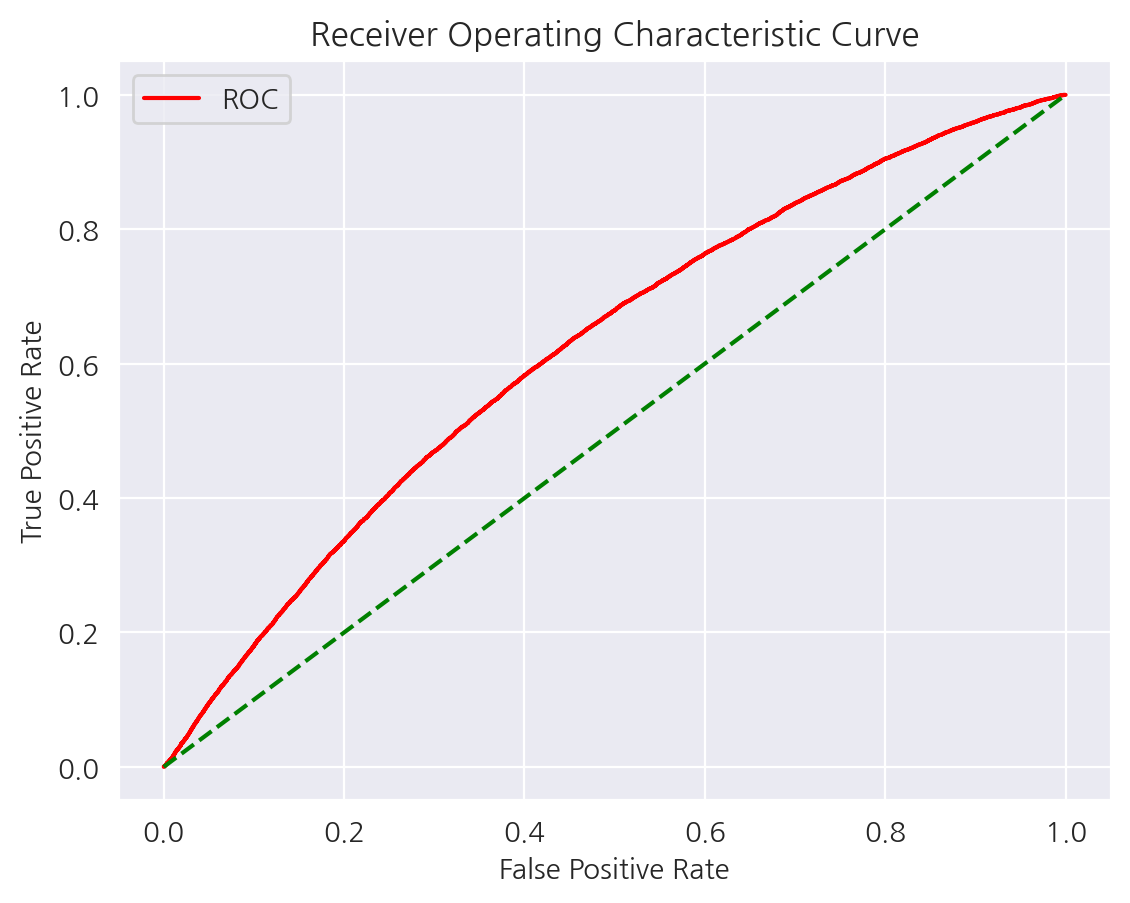

(LogisticRegression(), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(yn_label_X, yn_y,
                                                    test_size = 0.2,
                                                    random_state = 39)

# MinMaxScaler fit
scaler = MinMaxScaler()
scaler.fit(X_train)

# 데이터 변환
X_train_mm = pd.DataFrame(scaler.transform(X_train))
X_test_mm = pd.DataFrame(scaler.transform(X_test))

for i, col_name in enumerate(X_train.columns):
  X_train_mm = X_train_mm.rename(columns = {i : col_name})
  X_test_mm = X_test_mm.rename(columns = {i : col_name})

# model fit
logistic_classifier(X_train_mm, X_test_mm, y_train, y_test)

#### 사고율 Linear Regression

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(per_label_X, per_y,
                                                    test_size = 0.2,
                                                    random_state = 39)

# MinMaxScaler fit
scaler = MinMaxScaler()
scaler.fit(X_train)

# 데이터 변환
X_train_mm = pd.DataFrame(scaler.transform(X_train))
X_test_mm = pd.DataFrame(scaler.transform(X_test))

for i, col_name in enumerate(X_train.columns):
  X_train_mm = X_train_mm.rename(columns = {i : col_name})
  X_test_mm = X_test_mm.rename(columns = {i : col_name})

# model fit
linear_regression(X_train_mm, X_test_mm, y_train, y_test)

R-square : 0.010994862769948655 

RMSE : 0.3871582496717673

기울기

연령대 : 0.02396775689414644
성별 : -0.0026724796531613073
국산차량여부 : -0.07516310387157747
직전3년간사고건수 : -0.09429744555023897
차량경과년수 : -0.036585326925354475
차종 : 0.050160822347899724
운전자한정특별약관 : 0.007387477369065525
가입경력코드 : -0.005887650606913354
차량가입금액 : -0.10351584152317155
영상기록장치특약가입 : -0.013716401558864158
마일리지약정거리 : 0.02292214234770116

절편 : 0.2864956701627748 



(LinearRegression(),
 array([0.16535336, 0.21634231, 0.18468883, ..., 0.17056201, 0.09263629,
        0.163576  ]))

### 전처리 2 : 순서 반영 Label Encoding

In [ ]:
yn_orderlabel_X = yn_X.copy()

In [ ]:
# 연령대 수치로 그대로 사용
yn_orderlabel_X['연령대'] = yn_orderlabel_X['연령대'].apply(lambda x: int(str(x).replace(',', '').split('.')[0]))

# 남자는 1, 여자는 0
yn_orderlabel_X['성별'] = yn_orderlabel_X['성별'].apply(lambda x: 1 if int(str(x).replace('.','').split('.')[0]) == 2 else 0)

# 국산은 1, 외제는 0, 결측치는 1
yn_orderlabel_X['국산차량여부'] = yn_orderlabel_X['국산차량여부'].apply(lambda x: 1 if str(x) == "nan" else (0 if int(str(x).replace('.','').split('.')[0]) == 2 else 1))
yn_orderlabel_X

# df['사고율'] = df.apply(lambda row: 0 if row['YUHO'] == 0 else row['SAGO'] / row['YUHO'], axis=1)

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리
0,0,0,1,B,신차,기타,가족및형제자매한정,8.0,5천만원이하,가입,15000K
1,0,0,1,N,신차,기타,기명피보험자1인한정,8.0,미가입,미가입,15000K
2,0,0,1,N,신차,기타,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입
3,0,0,1,N,10년이상,중형,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K
4,0,0,1,Z,5년이하,다목적2종,가족한정(형제자매제외),1.0,미가입,미가입,미가입
...,...,...,...,...,...,...,...,...,...,...,...
267772,40,0,1,C,10년이상,중형,누구나(기본),8.0,미가입,미가입,7000K
267773,40,0,1,C,5년이하,소형A,부부 및 자녀한정,8.0,5천만원이하,가입,15000K
267774,40,0,1,C,10년이하,소형A,기명피보험자1인한정,8.0,미가입,미가입,미가입
267775,40,0,1,C,5년이하,소형B,누구나(기본),7.0,5천만원이하,가입,미가입


In [ ]:
# 신규 0, 무사고 1, 1회 2, 2회 3, 3회 4, 결측치 0 은 무사고로 편입
yn_orderlabel_X['직전3년간사고건수'] = yn_orderlabel_X['직전3년간사고건수'].apply(lambda x: str(x).replace('0', 'N'))
yn_orderlabel_X['직전3년간사고건수'] = yn_orderlabel_X['직전3년간사고건수'].apply(lambda x: int(str(x).replace('Z', '0').replace('N', '1').replace('D', '2').replace('C', '3').replace('B', '4')))


yn_orderlabel_X['차량경과년수'] = yn_orderlabel_X['차량경과년수'].apply(lambda x: int(str(x).replace('신차', '0').replace('5년이하', '1').replace('10년이하', '2').replace('10년이상', '3')))

yn_orderlabel_X['차종'] = yn_orderlabel_X['차종'].apply(lambda x: int(str(x).replace('소형A', '0').replace('소형B', '1').replace('중형', '2').replace('대형', '3').replace('다목적1종','4').replace('다목적2종','5').replace('기타','6')))

yn_orderlabel_X['가입경력코드'] = yn_orderlabel_X['가입경력코드'].apply(lambda x: int(str(x).split('.')[0]))

yn_orderlabel_X['차량경과년수'] = yn_orderlabel_X['차량경과년수'].apply(lambda x: int(str(x).replace('신차', '0').replace('5년이하', '1').replace('10년이하', '2').replace('10년이상', '3')))


In [ ]:
yn_orderlabel_X[yn_orderlabel_X["차량가입금액"]=="미가입"]["차량경과년수"].value_counts()

2    28854
3    27967
1    18473
0     3502
Name: 차량경과년수, dtype: int64

In [ ]:
# 차량가입금액
yn_orderlabel_X['차량가입금액'] = yn_orderlabel_X['차량가입금액'].apply(lambda x : int(str(x).replace('미가입','0').replace('5천만원이하','1').replace('1억이하','2').replace('1억이상','3')))

yn_orderlabel_X['영상기록장치특약가입'] = yn_orderlabel_X['영상기록장치특약가입'].apply(lambda x : 1 if str(x)=='가입' else 0)

yn_orderlabel_X['마일리지약정거리'] = yn_orderlabel_X['마일리지약정거리'].apply(lambda x: str(x).replace('12000K','4').replace('15000K','5').replace('미가입','6'))
yn_orderlabel_X['마일리지약정거리'] = yn_orderlabel_X['마일리지약정거리'].apply(lambda x: int(str(x).replace('3000K', '0').replace('5000K', '1').replace('7000K', '2').replace('10000K', '3')))

yn_orderlabel_X

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리
0,0,0,1,4,0,6,가족및형제자매한정,8,1,1,5
1,0,0,1,1,0,6,기명피보험자1인한정,8,0,0,5
2,0,0,1,1,0,6,가족한정(형제자매제외),5,1,1,6
3,0,0,1,1,3,2,가족한정(형제자매제외),2,1,0,5
4,0,0,1,0,1,5,가족한정(형제자매제외),1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...
267772,40,0,1,3,3,2,누구나(기본),8,0,0,2
267773,40,0,1,3,1,0,부부 및 자녀한정,8,1,1,5
267774,40,0,1,3,2,0,기명피보험자1인한정,8,0,0,6
267775,40,0,1,3,1,1,누구나(기본),7,1,1,6


### 사고유무 Logistic Regression

#### Label Encoding

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(yn_orderlabel_X, yn_y,
                                                    test_size = 0.2,
                                                    random_state = 39)

# model fit
logistic_classifier(X_train, X_test, y_train, y_test)

ValueError: could not convert string to float: '1인 및 지정1인'

### 사고율 Linear Regression

#### Label Encoding

In [ ]:
# train-test split / 사고율이나 사고유무나 x 데이터는 똑같아서 새로 안만들고 yn 사용
X_train, X_test, y_train, y_test = train_test_split(yn_orderlabel_X, per_y,
                                                    test_size = 0.2,
                                                    random_state = 39)

# model fit
linear_regression(X_train, X_test, y_train, y_test)

### 다른 시도

In [ ]:
# # 선형회귀 - statmodels 사용
# import statsmodels.formula.api as sm

# result = sm.ols(formula = 'score ~ iq + academy + game + tv', data = df).fit()

# print('절편과 기울기')
# print(result.params)
# print()
# print('유의확률:' , result.pvalues)
# print()

# print('결정계수:' , result.rsquared)

# print('각 학생의 예측 점수:', result.predict())